In [33]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('banco.csv')
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
def calcular_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return IQR, Q1, Q3


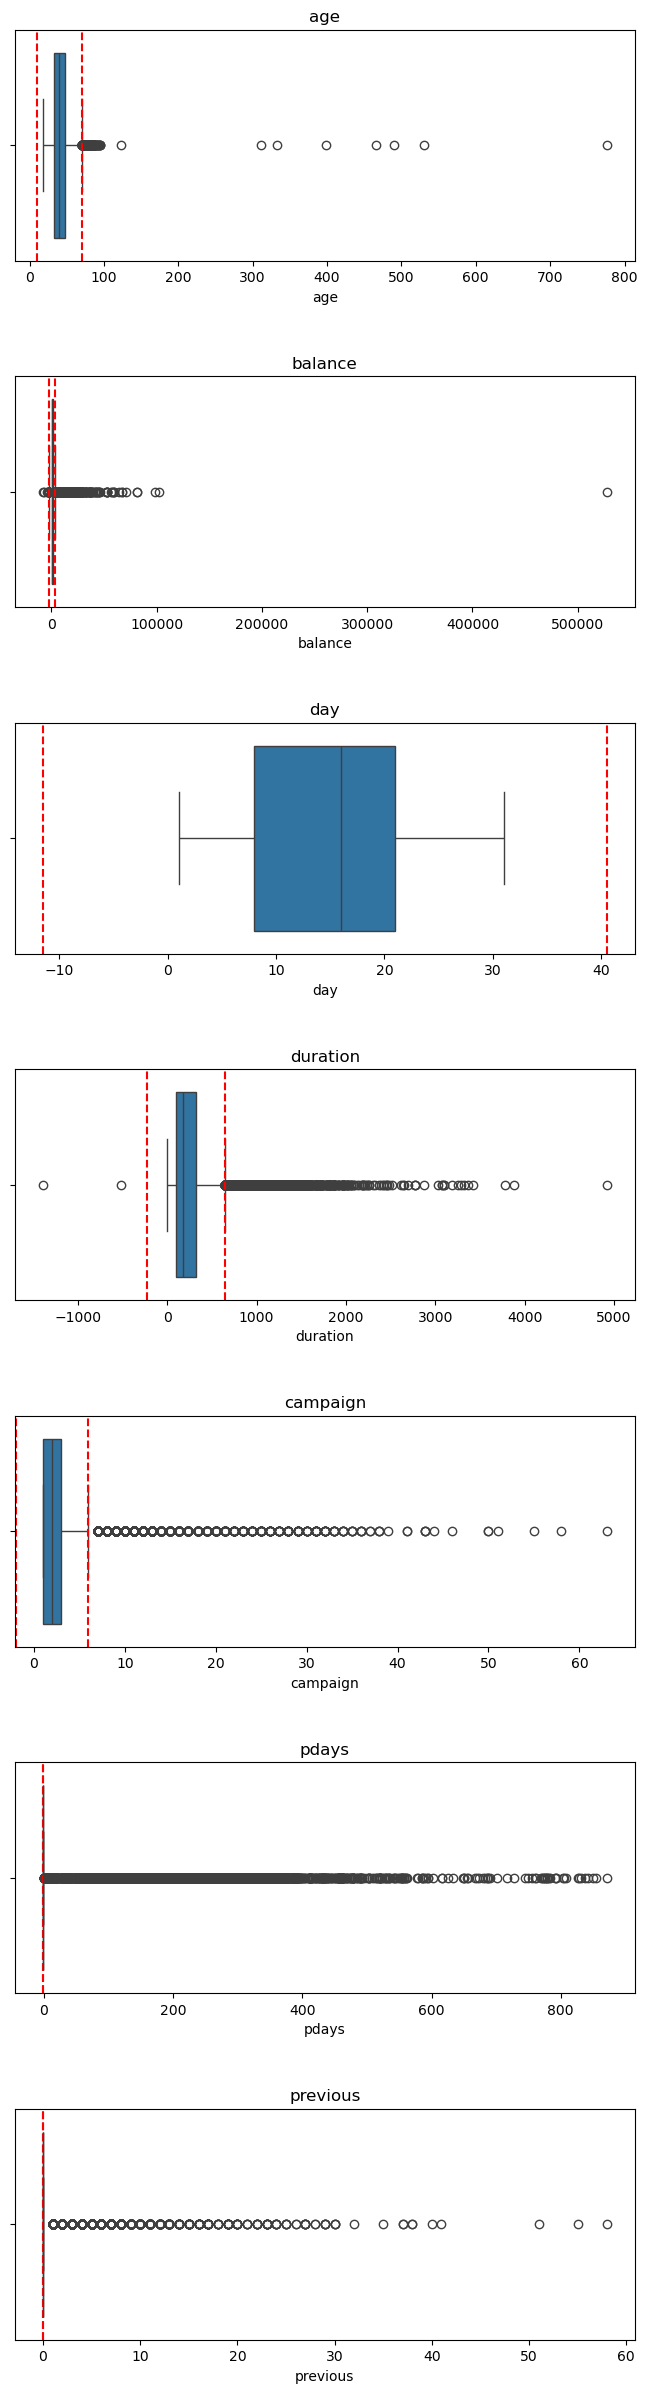

In [23]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    IQR,Q1,Q3=calcular_iqr(df[col])
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].axvline((Q1-(1.5*IQR)), color='r', linestyle='--')
    ax[i].axvline((Q3+(1.5*IQR)), color='r', linestyle='--')
    ax[i].set_title(col)

In [12]:
print(f"tamaño deñl set antes de eliminar registros de duracion: {df.shape}")
df = df[df['duration']>0]
print(f"tamaño del set despues de eliminar registros de duracion: {df.shape}")

tamaño deñl set antes de eliminar registros de duracion: (45215, 17)
tamaño del set despues de eliminar registros de duracion: (45209, 17)


In [22]:
# Recargar el DataFrame original si es necesario
df = pd.read_csv('banco.csv')

print(f"tamaño del set antes de eliminar registros de previous: {df.shape}")
df = df[df['previous'] <= 95]
print(f"tamaño del set despues de eliminar registros de previous: {df.shape}")

tamaño del set antes de eliminar registros de previous: (45215, 17)
tamaño del set despues de eliminar registros de previous: (45214, 17)


In [24]:

IQR,Q1,Q3=calcular_iqr(df[col])
sns.boxplot(x=col, data=df, ax=ax[i])
ax[i].axvline((Q1-(1.5*IQR)), color='r', linestyle='--')
ax[i].axvline((Q3+(1.5*IQR)), color='r', linestyle='--')
ax[i].set_title(col)



Text(0.5, 1.0, 'previous')

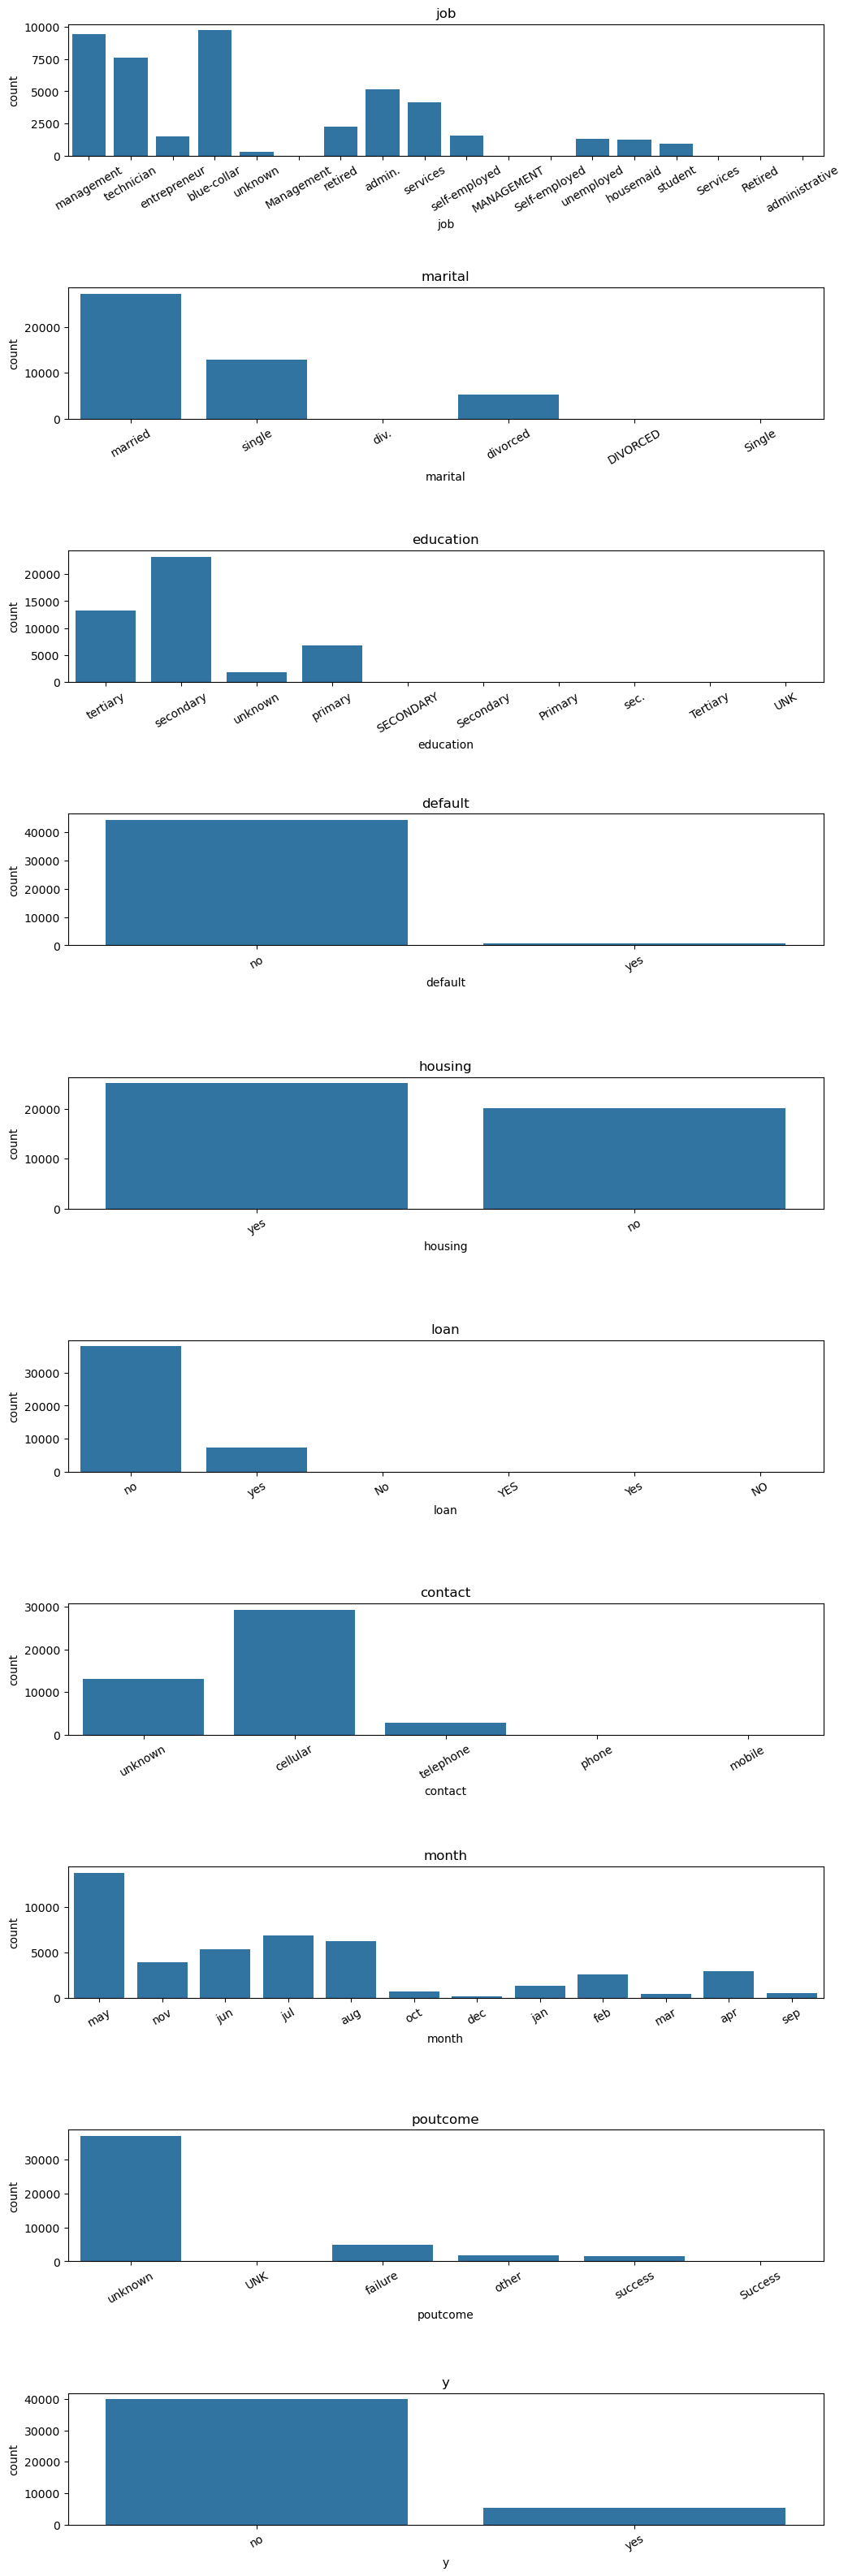

In [35]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(12, 40))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

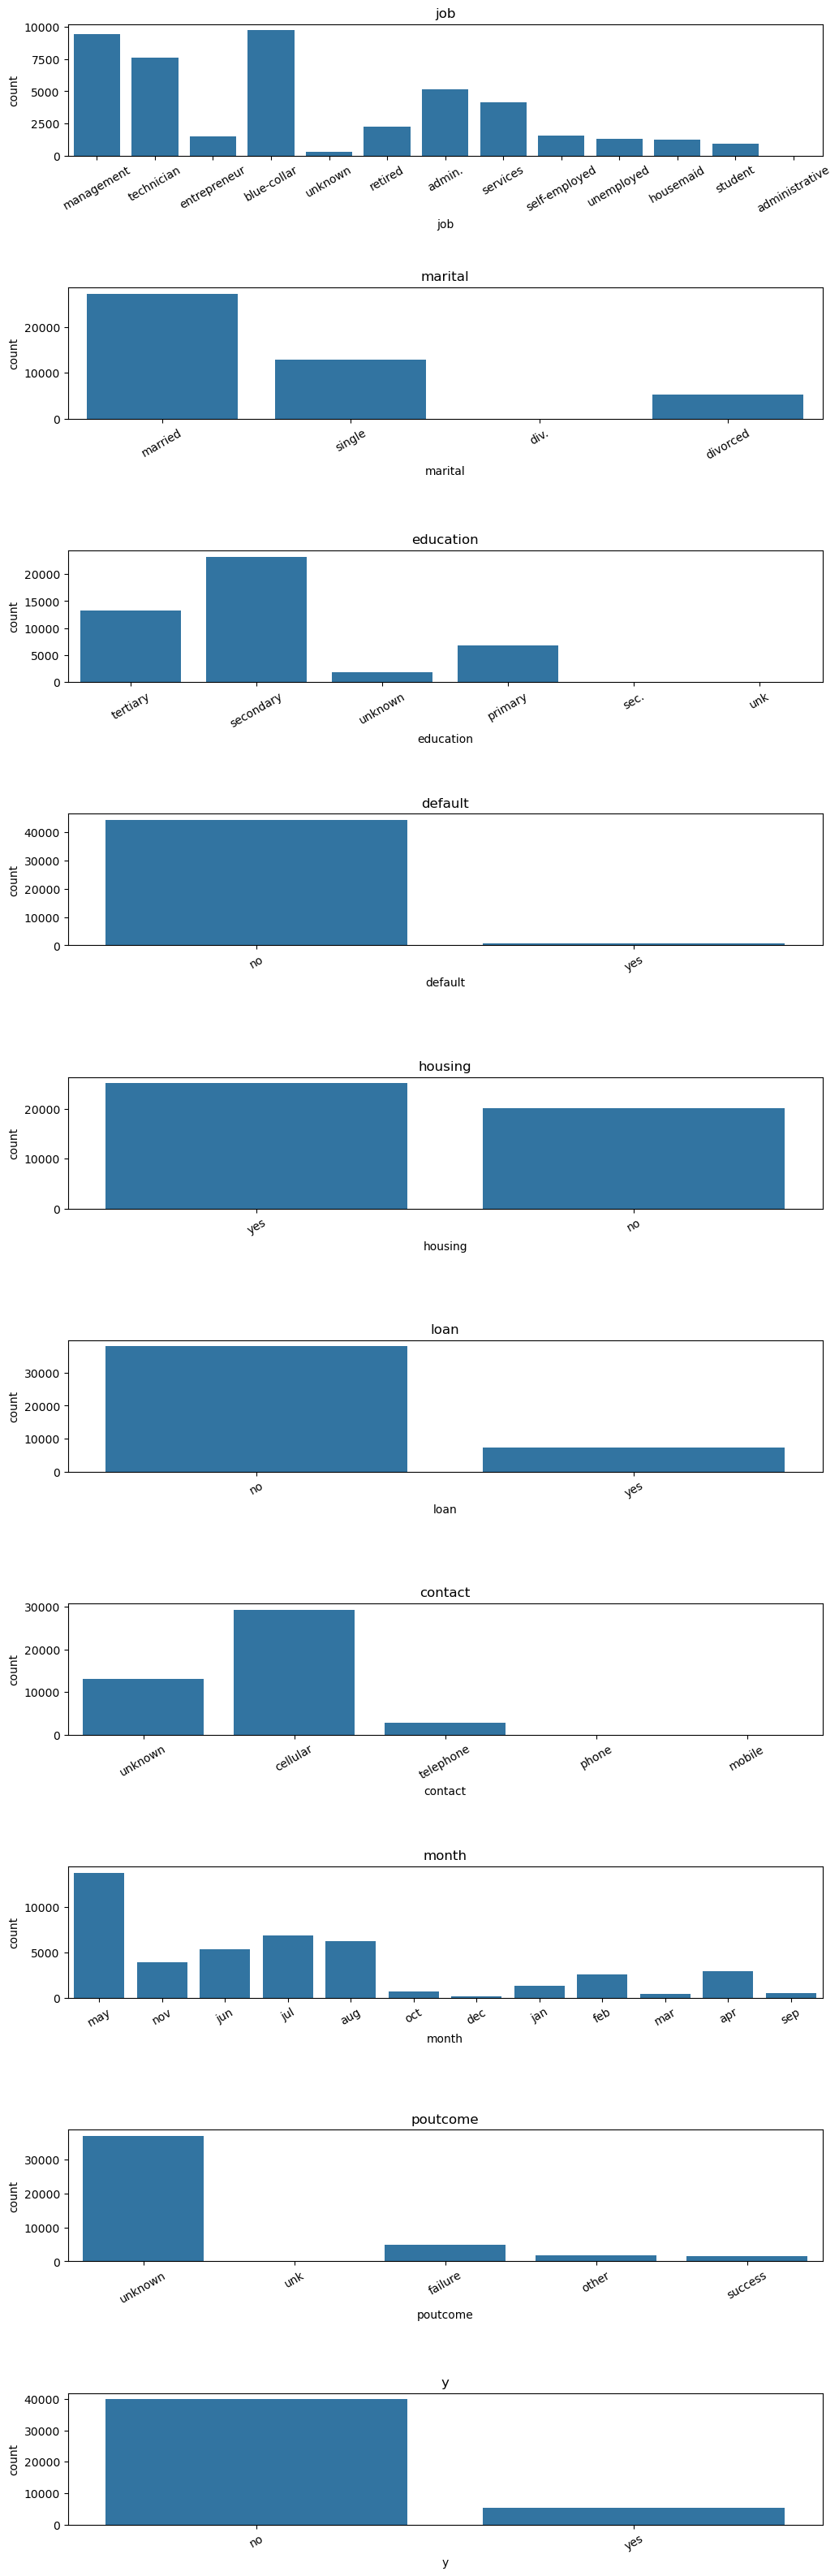

In [ ]:
for column in df.columns:
    #representar en minusculas solo si la columna es categorica
    if column in cols_cat:
        df[column] = df[column].str.lower()
        
#generar nuevamente las graficas
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(12, 40))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
        

In [40]:
#unificar admin y administrativo
print(df['job'].unique())
df['job']=df['job'].replace('admin.','administrative', regex=False)
print(df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student' nan]
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student' nan]


In [41]:
#marital: unificar div y divorciado
print(df['marital'].unique())
df['marital']=df['marital'].replace('div.','divorced', regex=False)
print(df['marital'].unique())




['married' 'single' 'div.' 'divorced' nan]
['married' 'single' 'divorced' nan]


In [44]:
print(df['education'].unique())
df['education']=df['education'].str.replace('sec','secondary', regex=False)
df.loc[df['education']=='unk', 'education'] = 'unknown'
print(df['education'].unique())

['tertiary' 'secondaryondary' 'unknown' 'primary' 'secondary.' 'unk' nan]
['tertiary' 'secondaryondaryondary' 'unknown' 'primary' 'secondaryondary.'
 nan]


In [45]:
print(df['contact'].unique())
df.loc[df['contact']=='phone', 'contact'] = 'telephone'
df.loc[df['contact']=='mobile', 'contact'] = 'cellular'
print(df['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [47]:
print(df['poutcome'].unique())
df.loc[df['poutcome']=='unk', 'poutcome'] = 'unknown'
print(df['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [48]:
df.shape

(45214, 17)

In [49]:
ruta = 'banco_limpio.csv'
df.to_csv(ruta, index=False)